# Task 5. Algorithms on graphs. Introduction to graphs and basic algorithms on graphs
Alexandra Matveeva J4134c


In [13]:
import numpy as np
from collections import defaultdict 
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import pprint

In [3]:
def adjacency_matrix(vertices, edges):
  matrix = np.zeros((vertices, vertices))
  edge = 0
  while edge < edges:
    i = np.random.randint(0, vertices)
    j = np.random.randint(0, vertices)
    if i != j and matrix[i][j] == 0:
      matrix[i][j] = 1
      matrix[j][i] = 1
      edge += 1
  return matrix

In [4]:
def matrixToList(matrix):
  adjacencyList = defaultdict(list)
  for i in range(len(matrix)):
    for j in range(len(matrix[i])):
      if matrix[i][j]== 1:
        temp = "{0}".format(j)
        adjacencyList["{0}".format(i)].append(temp)
  return adjacencyList

I PART

In [5]:
V = 100 #vertices
E = 200 #edjes
matrix = adjacency_matrix(V, E)

In [6]:
adj_list = matrixToList(matrix)

Adjecency matrix:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

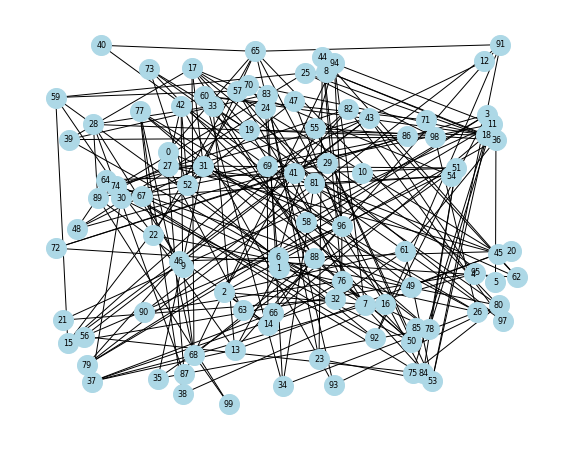

In [7]:
print('Adjecency matrix:\n', matrix[:20, :20], '\n')
print('Adjecency list:\n')
for i in range(20):
    temp = "{}".format(i)
    print ("{0}: {1}".format(i, adj_list[temp]))
print('\nGraph visualization: :\n')
G = nx.Graph(matrix)
pos = nx.random_layout(G)
plt.figure(3, figsize=(10, 8))
labels = {}
for k in range(V):
  labels[k] = "{0}".format(k)
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color="black")
nx.draw(G, pos, node_size = 400, node_color = "lightblue", edge_color = "black")

II PART

In [9]:
# Breadth-first search (BFS)

In [11]:
def DFS(graph, start, visited, path):
  if start in visited:
    return visited, path
  visited.append(start)
  path.append(start)
  for node in graph.neighbors(start):
    visited, path = DFS(graph, node, visited, path)
  return visited, path

In [12]:
import pprint as ppp
def find_con_comp(graph):
  visited = []
  connected_components = []
  for node in graph.nodes:
    if node not in visited:
      cc = [] #connected component
      visited, cc = DFS(graph, node, visited, cc)
      connected_components.append(cc)
  return connected_components

In [16]:
connected_components = find_con_comp(G)
print("Total number of connected components =", len(connected_components))
for cc in connected_components:
    pp = pprint.PrettyPrinter(width=41, compact=True)
    pp.pprint(cc)


Total number of connected components = 3
[0, 65, 22, 13, 1, 24, 16, 38, 77, 26,
 31, 15, 43, 4, 68, 9, 42, 27, 45, 17,
 19, 18, 8, 25, 36, 2, 7, 39, 83, 23, 44,
 62, 69, 12, 14, 63, 66, 37, 30, 11, 21,
 32, 59, 57, 81, 34, 60, 71, 88, 50, 55,
 53, 61, 64, 51, 6, 94, 87, 28, 33, 80,
 75, 93, 46, 20, 67, 54, 79, 3, 48, 89,
 86, 72, 41, 76, 90, 96, 47, 52, 70, 73,
 97, 82, 74, 49, 92, 91, 56, 84, 99, 58,
 78, 35, 40, 98, 5, 29, 95]
[10]
[85]


In [19]:
# Function to find the shortest path between two nodes of a graph
def BFS(graph, start, goal):
    explored = []
    queue = [[start]]
    if start == goal:
        print("Same Node")
        return
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                if neighbour == goal:
                    print("Shortest path = ", *new_path)
                    return
            explored.append(node)
 
    print("Connecting path doesn't exist")
    return

In [24]:
BFS(G, 3, 99)

Shortest path =  3 48 89 99
